![ML](ml.png)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def load_data(path,t_size):
    df=pd.read_csv(path)
    y=df.iloc[:,-1]
    X=df.iloc[:,:-1]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=1)
    return x_train, x_test, y_train, y_test

path= 'E:/master99/7/python lecture/python files/iris.csv'
t_size = .3
x_train, x_test, y_train, y_test = load_data(path,t_size)
y_train

118     virginica
18         setosa
4          setosa
45         setosa
59     versicolor
          ...    
133     virginica
137     virginica
72     versicolor
140     virginica
37         setosa
Name: species, Length: 105, dtype: object

In [ ]:
def load_data_filtered(path,t_size):
    df=pd.read_csv(path)
    # pd.concat([df1,df2],axis)
    df = pd.concat([df[df.iloc[:,-1]=='setosa'],df[df.iloc[:,-1]=='versicolor']],axis=0)
    # display(df)
    y=df.iloc[:,-1]
    X=df.iloc[:,:-1]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=1)
    return x_train, x_test, y_train, y_test

path= 'E:/master99/7/python lecture/python files/iris.csv'
t_size = .2
x_train, x_test, y_train, y_test = load_data_filtered(path,t_size)

In [3]:
x_train
# y_train

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


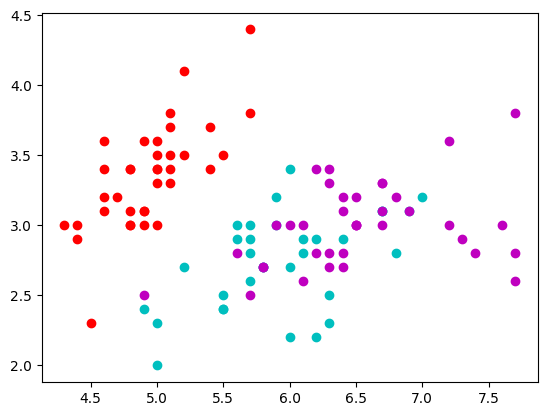

In [4]:
plt.scatter(x_train.iloc[:, 0][y_train=='setosa'], x_train.iloc[:, 1][y_train=='setosa'],c='r')
plt.scatter(x_train.iloc[:, 0][y_train=='versicolor'], x_train.iloc[:, 1][y_train=='versicolor'],c='c')
plt.scatter(x_train.iloc[:, 0][y_train=='virginica'], x_train.iloc[:, 1][y_train=='virginica'],c='m')

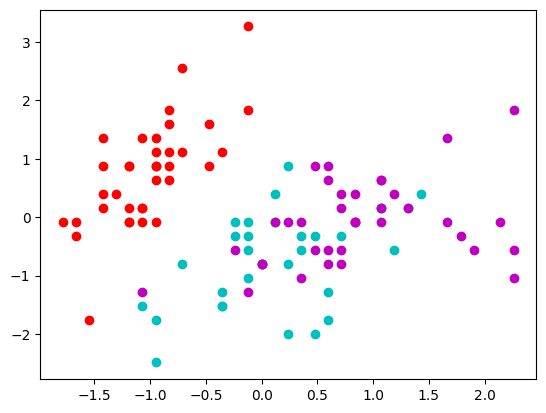

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

plt.scatter(x_train[:, 0][y_train=='setosa'], x_train[:, 1][y_train=='setosa'],c='r')
plt.scatter(x_train[:, 0][y_train=='versicolor'], x_train[:, 1][y_train=='versicolor'],c='c')
plt.scatter(x_train[:, 0][y_train=='virginica'], x_train[:, 1][y_train=='virginica'],c='m')

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)
y_hat= model.predict(x_test)
# display(x_test,y_hat)
acc = accuracy_score(y_test, y_hat)
conf=confusion_matrix(y_test, y_hat)
display(y_hat,acc,conf)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

0.9555555555555556

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

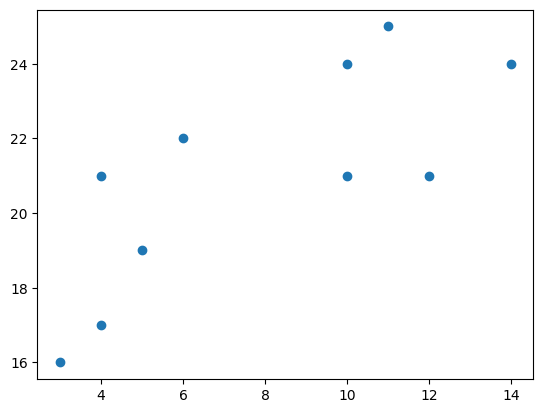

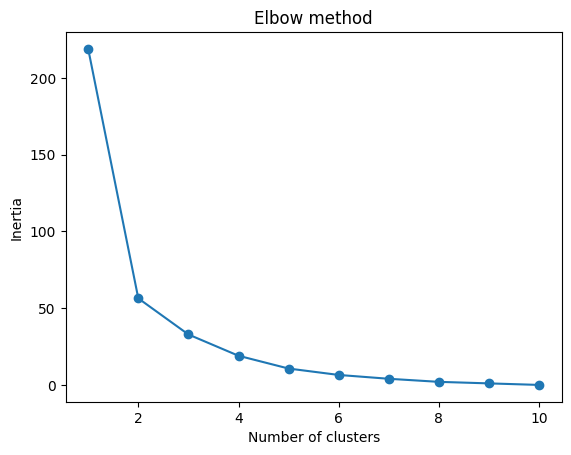

In [9]:
from sklearn.cluster import KMeans

def elbow(data):
    inertias = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1,11), inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(x, y))
data
plt.scatter(x, y)
plt.show()
elbow(data)

K-means clustering 
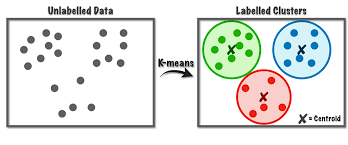

Inertia : ![inertia](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeogvTtEzM5R1mRMKFM1lJf9U9xRJ40Aw-X0qpUCmlzw&s)

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=2 is the “elbow” of this graph.

data: [(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

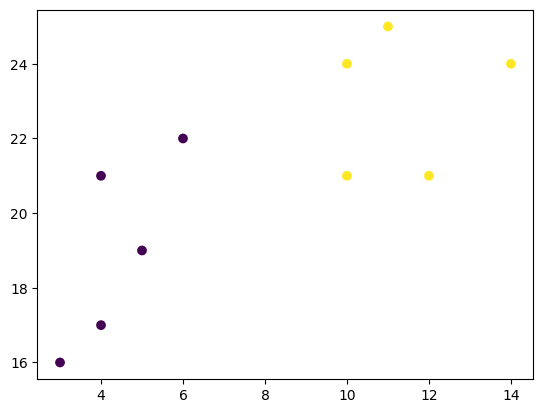

In [11]:
kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(data)
print("data:",data)
display(kmeans.labels_)

plt.scatter(x, y,c=kmeans.labels_)
plt.show()


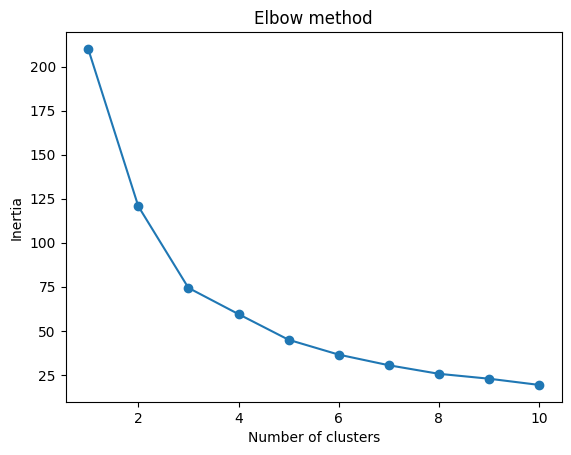

In [13]:
x=x_train[:,0]
y=x_train[:,1]
data = list(zip(x, y))
# display(x,y)
elbow(data)

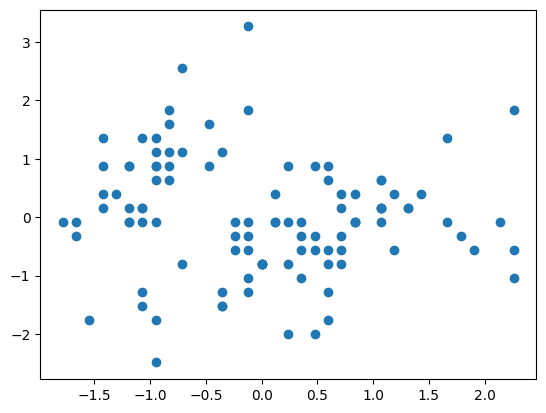

In [14]:
plt.scatter(x, y)
plt.show()

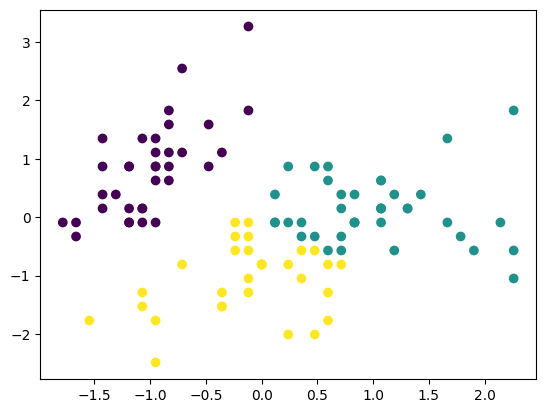

In [16]:
kmeans = KMeans(n_clusters=3,n_init=10)
kmeans.fit(data)
# print("data:",data)
# display(kmeans.labels_)

plt.scatter(x, y,c=kmeans.labels_)
plt.show()